In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

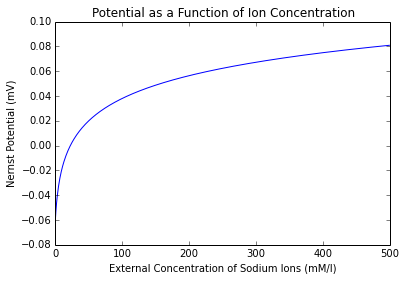

In [6]:
def nernst(out_conc):
    in_conc = 10
    n = 1
    RT_F = 27e-3
    E = RT_F/n*np.log(out_conc/in_conc)
    return E
    
out_conc = np.linspace(1, 200, 500)
plt.plot(nernst(out_conc))
plt.title("Potential as a Function of Ion Concentration")
plt.ylabel("Nernst Potential (mV)")
plt.xlabel("External Concentration of Sodium Ions (mM/l)")
plt.savefig("nernst")

In [38]:
class SpikingLif(object):
    def __init__(self, dt=0.001):
        self.refac_time = 0.0
        self.t_ref = 0.002
        self.refac = True
        self.dt = dt
        
        self.resist = 1e6
        self.cap = 10e-9
        self.k_pot = -0.075
        self.leak_pot = -0.065
        self.membrane_area = 0.1
        
        
        self.potential = 0.0
        self.reset_pot = -0.070
        self.spk_pot = -0.055
        
        self.adapt_cond = 0.0
        self.t_adapt = 0.1
        self.adapt_inc = 1e-9

    def spike(self, current):
        if(self.refac == False):
            # use that differential equation
            dV = (
                    1/(self.resist*self.cap) * (self.leak_pot + current*self.resist*self.membrane_area - self.potential) -
                    self.adapt_cond/self.cap*(self.potential - self.k_pot)
            )*self.dt

            self.potential += dV
            
            dg = -self.adapt_cond / self.t_adapt * self.dt
            self.adapt_cond += dg
            
            # If we've reached the threshold, spike
            if(self.potential >= self.spk_pot):
                # start the refactory period and reset the potential
                self.refac = True
                self.potential = self.reset_pot
                return [2.0, self.adapt_cond]
            return [self.potential, self.adapt_cond]
        else:
            # increment the refactory period
            self.refac_time += self.dt
            if(self.refac_time >= self.t_ref):
                # if we've reached the maximum refactory period, reset it
                self.refac = False
                self.refac_time = 0.0
                
                # also increase the spike adaptation
                self.adapt_cond += self.adapt_inc
                
            return [self.reset_pot, self.adapt_cond]

In [39]:
input_current = 1.1e-9

step = 5e-4
t_range = np.arange(0, 0.5, step)
spk_lif = SpikingLif(dt=step)
spk_res = []

for t in list(t_range):
    spk_res.append(np.array(spk_lif.spike(input_current)))
spk_res = np.array(spk_res)

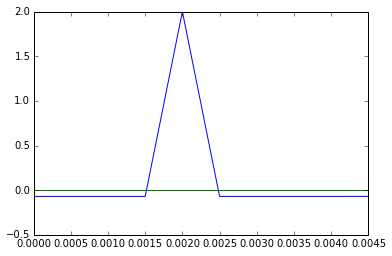

In [49]:
plt.plot(t_range[:10], spk_res[:10, :])

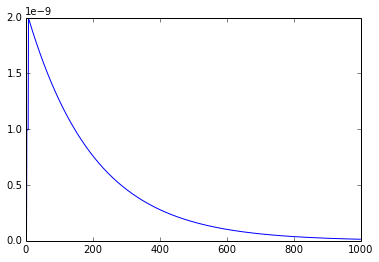

In [52]:
plt.plot(spk_res[:, 1])